In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('GSPC.csv')

In [ ]:
df.shape

(5621, 7)

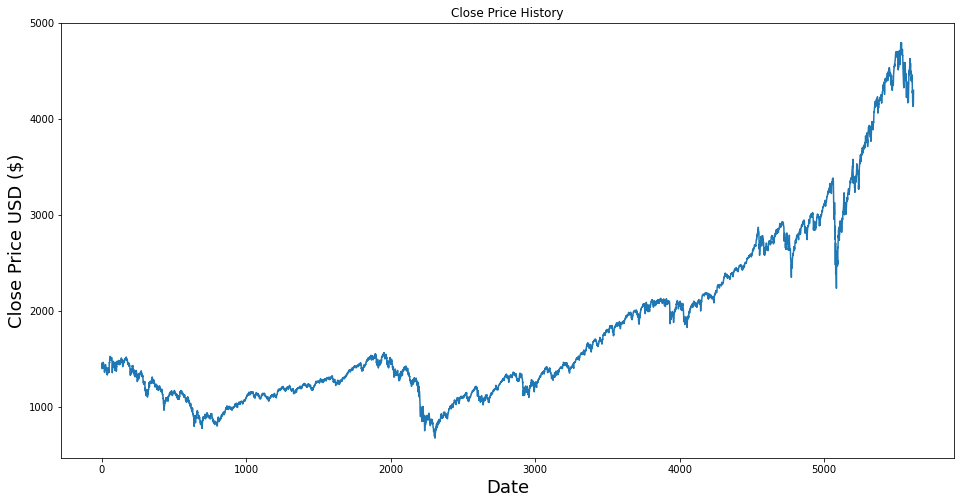

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
import math

In [ ]:
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)
training_data_len

4497

In [ ]:
import seaborn as sns
plt.style.use("fivethirtyeight")
sns.set_style('whitegrid')
%matplotlib inline
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.18900104],
       [0.17545746],
       [0.17611036],
       ...,
       [0.84437488],
       [0.84925351],
       [0.87951784]])

In [ ]:
#Creating the scaled training data set
train_data = scaled_data[0:training_data_len  , : ]
#Spliting the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.18900104, 0.17545746, 0.17611036, 0.17643559, 0.18566368,
       0.1895787 , 0.1849574 , 0.18342584, 0.18765641, 0.19141123,
       0.18898163, 0.1891661 , 0.18665881, 0.18563699, 0.17596959,
       0.17803268, 0.17659093, 0.17524873, 0.1659284 , 0.17425357,
       0.17785065, 0.1778118 , 0.18165886, 0.18151323, 0.18148168,
       0.18572436, 0.17844043, 0.17968314, 0.17247204, 0.17315648,
       0.17609581, 0.17260554, 0.17274874, 0.16251336, 0.1639891 ,
       0.16605702, 0.16429492, 0.15942358, 0.16298911, 0.16744781,
       0.17054728, 0.17117108, 0.17782395, 0.17348175, 0.16482646,
       0.16751575, 0.1760084 , 0.17440162, 0.17162253, 0.16568326,
       0.17369048, 0.18978986, 0.19124616, 0.18934327, 0.19838204,
       0.20002524, 0.20650819, 0.20653489, 0.20566111, 0.20174609])]
[0.20193784616088406]

[array([0.18900104, 0.17545746, 0.17611036, 0.17643559, 0.18566368,
       0.1895787 , 0.1849574 , 0.18342584, 0.18765641, 0.19141123,
       0.18898163, 0.1891661 , 0.18

In [ ]:
#Here we are Converting x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
4437/4437 [==============================] - 129s 29ms/step - loss: 1.2239e-04
Epoch 2/10
4437/4437 [==============================] - 119s 27ms/step - loss: 7.9839e-05
Epoch 3/10
4437/4437 [==============================] - 116s 26ms/step - loss: 5.3735e-05
Epoch 4/10
4437/4437 [==============================] - 133s 30ms/step - loss: 4.4610e-05
Epoch 5/10
4437/4437 [==============================] - 134s 30ms/step - loss: 4.2340e-05
Epoch 6/10
4437/4437 [==============================] - 125s 28ms/step - loss: 3.7237e-05
Epoch 7/10
4437/4437 [==============================] - 118s 27ms/step - loss: 3.6401e-05
Epoch 8/10
4437/4437 [==============================] - 116s 26ms/step - loss: 3.6473e-05
Epoch 9/10
4437/4437 [==============================] - 121s 27ms/step - loss: 3.2081e-05
Epoch 10/10
4437/4437 [==============================] - 113s 25ms/step - loss: 3.1901e-05


In [ ]:
# here we are testing data set
test_data = scaled_data[training_data_len - 60: , : ]
#Creating the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
x_test = np.array(x_test)


In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [ ]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

259.64206440884254

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


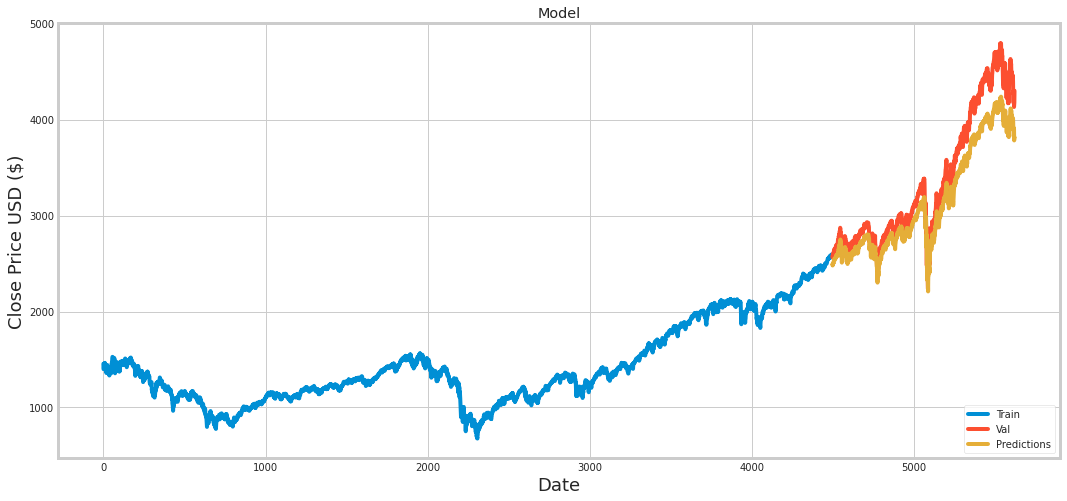

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
print(valid)

            Close  Predictions
4497  2564.620117  2491.492432
4498  2585.639893  2480.119385
4499  2578.850098  2498.463135
4500  2582.139893  2489.195068
4501  2599.030029  2494.979248
...           ...          ...
5616  4287.500000  3844.051758
5617  4131.930176  3901.167969
5618  4155.379883  3783.301514
5619  4175.479980  3817.847900
5620  4300.169922  3815.830566

[1124 rows x 2 columns]
